In [17]:
import chainer
import random

In [28]:
# cifar10の読み込み
def load_cifar10():
    (train, test) = chainer.datasets.get_cifar10()
    return train, test

# 複数クラスラベルのデータセットから指定クラスラベルの1データセットを取得
def get_one_label_data(class_label, dataset):
    new_data = []
    for data in dataset:
        label = data[1]
        if label == class_label:
            new_data.append(data)
    return new_data

# 複数クラスラベルのデータセットから指定クラスラベルのtrain, testデータセットを取得
def get_one_label_dataset(class_label, train, test):
    train = get_one_label_data(class_label, train)
    test = get_one_label_data(class_label, test)
    return train, test

# 1データセットのラベルを指定のラベルに変更
def change_label_data(new_label, dataset):
    new_data = []
    for data in dataset:
        new_data.append((data[0], new_label))
    return new_data

# train, testデータセットのラベルを指定のラベルに変更
def change_label_dataset(new_label, train, test):
    train = change_label_data(new_label, train)
    test = change_label_data(new_label, test)
    return train, test

# 指定データ数分のtrainデータをランダムに取得
# data_n: 1クラスのデータ数
def choice_train_at_random(data_n, train):
    train = random.sample(train, data_n)
    return train

# 指定クラスラベルリストのtrain, testデータセットを取得
def get_specific_label_dataset(class_label_list, train, test, data_n=None):
    new_train = []
    new_test = []
    for i, label in enumerate(class_label_list):
        got_train, got_test = get_one_label_dataset(label, train, test)
        got_train, got_test = change_label_dataset(i, got_train, got_test)
        if data_n != None:
            got_train = choice_train_at_random(data_n, got_train)
        new_train += got_train
        new_test += got_test
    return new_train, new_test

In [32]:
class_label_list = [0,1,2]
train, test = load_cifar10()
train, test = get_specific_label_dataset(class_label_list, train, test, 4)

label_list = []
for d in train:
    label_list.append(d[1])
print("trainのラベルリスト: ", label_list)
print("trainデータ数:", len(train))
print("testデータ数:", len(test))

trainのラベルリスト:  [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]
trainデータ数: 12
testデータ数: 3000


In [21]:
# get_one_label_data()のテスト
train, test = load_cifar10()
dataset = get_one_label_data(1, train)

count = 0
for data in dataset:
    if data[1] == 1:
        count += 1
print("データセットが要求を満たすか: ", count == len(dataset))

データセットが要求を満たすか:  True


In [46]:
# get_one_label_dataset()のテスト
train, test = load_cifar10()
label = 2
train, test = get_one_label_dataset(label, train, test)

count = 0
for data in train:
    if data[1] == label:
        count += 1
print("trainデータ数: ", len(train))
print("trainデータセットが要求を満たすか: ", count == len(train))
count = 0
for data in test:
    if data[1] == label:
        count += 1
print("testデータ数: ", len(test))
print("testデータセットが要求を満たすか: ", count == len(test))

trainデータ数:  5000
trainデータセットが要求を満たすか:  True
testデータ数:  1000
testデータセットが要求を満たすか:  True


In [3]:
#  get_specific_label_dataset()のテスト
train, test = load_cifar10()
class_label_list = [1,2,7]
train, test = get_specific_label_dataset(class_label_list, train, test)

count = 0
for data in train:
    if data[1] == 1 or data[1] == 2 or data[1] == 7:
        count += 1
print("trainデータ数: ", len(train))
print("trainデータセットが要求を満たすか: ", count == len(train))
count = 0
for data in test:
    if data[1] == 1 or data[1] == 2 or data[1] == 7:
        count += 1
print("testデータ数: ", len(test))
print("testデータセットが要求を満たすか: ", count == len(test))

trainデータ数:  15000
trainデータセットが要求を満たすか:  True
testデータ数:  3000
testデータセットが要求を満たすか:  True


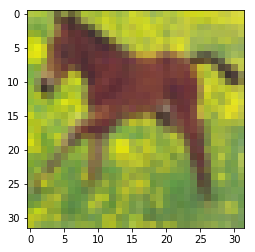

ラベル:  2


In [12]:
class_label_list = [1,2,7]

train, test = load_cifar10()
train, test = get_specific_label_dataset(class_label_list, train, test)

import numpy as np
import matplotlib.pyplot as plt
# 1枚画像の表示
#img = train[0]
#img = np.dstack((img[0][0], img[0][1], img[0][2]))
data_num = 13000
data = train[data_num]
img = np.dstack((data[0][0], data[0][1], data[0][2]))
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.show()
print("ラベル: ", train[data_num][1])

In [40]:
a = [(1,2,3),(2,3),(9,4)]
random.sample(a,2)

[(1, 2, 3), (2, 3)]